# Homework 4

In [0]:
# Imports
import keras
from keras import layers
from keras import models
from keras.layers.convolutional import Conv2D

import tensorflow as tf
from tensorflow import keras

Using TensorFlow backend.


## 1 General Concepts

The course this semester focused on deep learning. Deep learning is a subset of machine learning, and machine learning is a subset of artifical intelligence.

Artifical intelligence (AI) is the ability of computers or machines to possess cognitive abilites like humans. This branch of computer science attempts to provide machines capability to solve problems using decision-making, speech recognition, and language translation.

Machine learning, a subset of AI, involves the ability of these computers and machines to learn and improve thier functionatlities through experiences instead of being explicitly programmed to perform actions.

This class looked at trying to develope rules by providing networks the output they should predict in addition to features used for training and validation. 

Deep learning, a subset of machine learning, is how computers and machines solve complex problems using large amounts of data in artifical neural networks. Weights, updated using graident descent, and hidden layers are combined to create these deep learning networks.

## 2 Building A Model

A Convolutional Neural Network is usual composed of convolution and maxpooling layers to finally pass through a flattening operation. 

The inital convolutional layers detect the most basic of features such as varyig degrees of lines and edges. The deeper the convolutional layer is in the network, the more the convolutional layer can detect abstract features.

For example, a newtork that detects faces would begin with convolutional layers would look for horizonal edges that could indicate human eyes or look for vertical edges that could indicate a human nose. The deeper layers in the network would be able to specifically pick out human facial features such as eyes, noses, lips, and ears. Eventually the network would detect human faces.

The poolying layers in a convolutional neural network reduce the dimensions of a convolutional layer by shrinking the height and width. Max pooling specifically analyzes smaller areas of an image and selects the maximum value of each area to represent the rest.

Example model from Homework 2 question 3

In [0]:
model = models.Sequential()

model.add(layers.Conv2D(128, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D(2,2))
model.add(layers.Flatten())

model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

print('Model built')





Model built


## 3 Compiling A Model

Optimizers are used to determine how to train a neural network in Keras. Some optimizers are graident Stochastic Gradient Descent (SGD) and RMSProp. All optimizers strive to find the global minima where the cost fnction attains the least possilbe value. 

SGD is the most popular optimizer used due to its simple and effective method to finding optimum values. SGD randomly selects sampls for batches that are put through the neural network. To produce better results, the outputs from the network are compared to their intended outputs to produce gradients used to update weights.

The Root Mean Square Propogation (RMSProp) is also among the most popular optimizers used in deep learning. RMSProp solves the problem of vanishing or exploding gradients when inputs to each layer have varying scales and their updated gradients are dependent on them. To solve this, each layer retains its own mean graident throughout the network, and graident values are normalized by this mean to stabilize the network's training. 

Through gradient descent, a loss function is to be minimized during the network's training. Mean Squared Error (MSE) squares the differences between the predicted and expected values of a network, and it is most often used in applications involving linear regression. Cross-Entropy and logarithmic functions compare the probabilites to actual class output values. The yare most commonly used to analyze training data in classification problems.

Example of compiling from Homework 2 question 3

In [0]:
from keras import optimizers

# Compile
model.compile(
    loss='binary_crossentropy', 
    optimizer=optimizers.RMSprop(lr=1e-4),
    metrics=['accuracy']
)

print('Model complied')



Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Model complied


## 4 Training A Model

Training models can have 3 classifications: an underfitting model, an overfitting model, and a pretty good model.

Underfitting models are usually too simple in complexity or have not had enough training and produce results that are inaccurate. This is because there are no distinct patterns present in the data.

Overfitting models have too much complexity and discover an abundance of patterns in the data that are beyond the scope of the model's purpose. A common sign of an undefit model is very high training accuracy paired with low validaiton accuracy.

A pretty good model is an inbetween that recognizes a decent amount of patterns related to the model's purose and has high accuracy without going beyond the scope of the task. Some models of this calliber are produced by creating an overfitting model and then adding dropouts in the model to loses some information and fix the overfitting aspect.

### Classifying MNIST fashion items with dense layers and analyzing model performance

In [0]:
fashion_mnist = keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

train_images = train_images / 255.0
test_images = test_images / 255.0

# set up the layers

model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation=tf.nn.relu),
    keras.layers.Dense(10, activation=tf.nn.softmax)
])

# compile the model

model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

# train the model
epochs = 10
history = model.fit(train_images, 
                      train_labels, 
                      epochs=epochs,  
                      validation_data=(test_images, test_labels))

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 7s 109us/sample - loss: 0.4989 - acc: 0.8245 - val_loss: 0.4291 - val_acc: 0.8436
Epoch 2/10
60000/60000 [==============================] - 6s 107us/sample - loss: 0.3764 - acc: 0.8644 - val_loss: 0.3867 - val_acc: 0.8661
Epoch 3/10
60000/60000 [==============================] - 6s 105us/sample - loss: 0.3364 - acc: 0.8774 - val_loss: 0.3873 - val_acc: 0.8598
Epoch 4/10
60000/60000 [==============================] - 6s 108us/sample - loss: 0.3144 - acc: 0.8857 - val_loss: 0.3461 - val_acc: 0.8757
Epoch 5/10
60000/60000 [==============================] - 7s 112us/sample - loss: 0.2952 - acc: 0.8907 - val_loss: 0.3664 - val_acc: 0.8703
Epoch 6/10
60000/60000 [==============================] - 7s 110us/sample - loss: 0.2810 - acc: 0.8966 - val_loss: 0.3795 - val_acc: 0.8620
Epoch 7/10
60000/60000 [==============================] - 7s 110us/sample - loss: 0.2687 - acc: 0.9002 - val_l

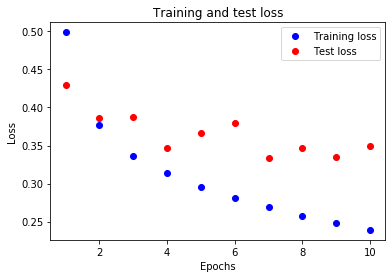

In [0]:
# Loss and Accuracy
import matplotlib.pyplot as plt

history_dict = history.history
loss_values = history_dict['loss']
test_loss_values = history_dict['val_loss']
epochs_range = range(1, epochs+1)

plt.plot(epochs_range, loss_values, 'bo', label='Training loss')
plt.plot(epochs_range, test_loss_values, 'ro', label='Test loss')
plt.title('Training and test loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

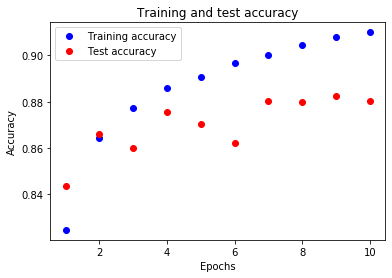

In [0]:
acc_values = history_dict['acc']
test_acc_values = history_dict['val_acc']

plt.plot(epochs_range, acc_values, 'bo', label='Training accuracy')
plt.plot(epochs_range, test_acc_values, 'ro', label='Test accuracy')
plt.title('Training and test accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

## 5 Finetuning A Pretrained Model

Performing training on models developed from scratch can demand extensive amounts of data and computing time based on the number of layers a model may have. Using a pretrained network, a network already trained on large datasets,  is often the optimal choice for smaller datasets.

To apply these pretrained networks to solved problems they may not have been originally intended to solve, you can "freeze" layers in the convolutional base to be selective of the learned weights in the network. 

After retaining the pretrained network with your modifications, you have the option to adjust if the produced results were not of the intended calliber. By unfreezing a small portion of the layers, more weigts will be modified to yield a different set of results. Unfreezing too many or all of the layers in a pretrained model could cost you too much computational time. This would be contradictory to the purpose of using a pretrained model in the first place.